In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

In [2]:
grid = al.Grid.uniform(shape_2d=(80, 80), pixel_scales=0.1, sub_size=1)
psf = al.Kernel.from_gaussian(shape_2d=(11, 11), sigma=0.1, pixel_scales=0.1)

In [3]:
NFW_profile = al.mp.SphericalNFW(centre=(0.0, 0.0), kappa_s=1, scale_radius=1.5)
lens_galaxy = al.Galaxy(
    redshift=0.035,
    mass=NFW_profile,
)
NFW_profile.einstein_radius_in_units()

1.8617066622868337

In [4]:
source_galaxy = al.Galaxy(
    redshift=2.1,
    light=al.lp.EllipticalSersic(
        centre=(0.2, -0.1),
        elliptical_comps=(0.3, 0.111111),
        intensity=3,
        effective_radius=0.5,
        sersic_index=1,
    ),
)

print(source_galaxy)

Redshift: 2.1
Light Profiles:
EllipticalSersic
centre: (0.2, -0.1)
elliptical_comps: (0.3, 0.111111)
axis_ratio: 0.5152490035093175
phi: 34.8384409156042
intensity: 3.0
effective_radius: 0.5
sersic_index: 1.0


In [5]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

In [6]:
mask = al.Mask.circular(
    shape_2d=grid.shape_2d, pixel_scales=grid.pixel_scales, sub_size=1,radius=3 ,centre=(0, 0)
)

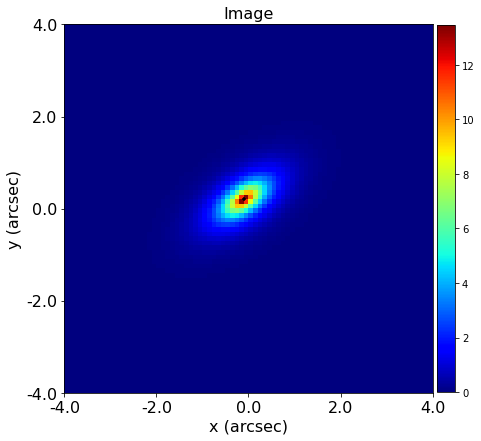

In [7]:
aplt.Galaxy.image(galaxy=source_galaxy, grid=grid)

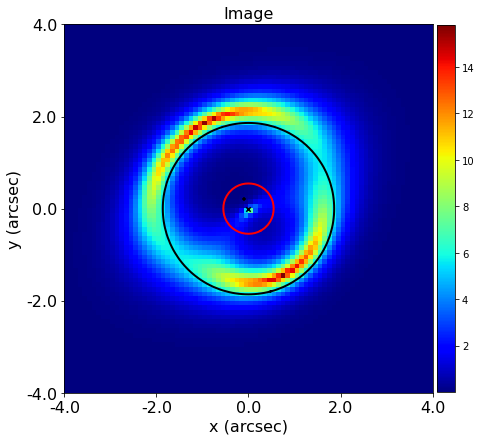

In [8]:
aplt.Tracer.image(tracer=tracer, grid=grid)

In [9]:
normal_image = tracer.image_from_grid(grid=grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=grid, psf_shape_2d=psf.shape_2d
)
print(normal_image.shape)
print(padded_image.shape)

(6400,)
(8100,)


In [10]:
simulator = al.SimulatorImaging(
    exposure_time_map=al.Array.full(fill_value=300.0, shape_2d=grid.shape_2d),
    psf=psf,
    background_sky_map=al.Array.full(fill_value=0.1, shape_2d=grid.shape_2d),
    add_noise=True,
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

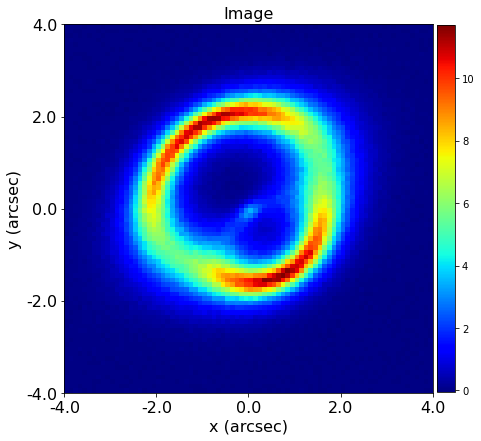

In [11]:
aplt.Imaging.image(imaging=imaging)

In [12]:
from pyprojroot import here

workspace_path = str(here())
dataset_path = f"{workspace_path}/howtolens/MGE/Data"
print("Dataset Path: ", dataset_path)

Dataset Path:  /home/carlos/autolens_workspace/howtolens/MGE/Data


In [13]:
imaging.output_to_fits(
    image_path=f"{dataset_path}/ImageNFW2.fits",
    noise_map_path=f"{dataset_path}/NoiseNFW2.fits",
    psf_path=f"{dataset_path}/PSFNFW2.fits",
    overwrite=True,
)

In [14]:
help(imaging.output_to_fits)

Help on method output_to_fits in module autoarray.dataset.imaging:

output_to_fits(image_path, psf_path=None, noise_map_path=None, overwrite=False) method of autoarray.dataset.imaging.Imaging instance



In [15]:
import autolens

In [16]:
print (autolens.__version__)

1.1.4
